In [ ]:
link='https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction'
!pip install opendatasets
import opendatasets as od
od.download(link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tishavarma
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction


100%|██████████| 262k/262k [00:00<00:00, 57.1MB/s]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
data=pd.read_csv('/content/bank-customer-churn-prediction/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


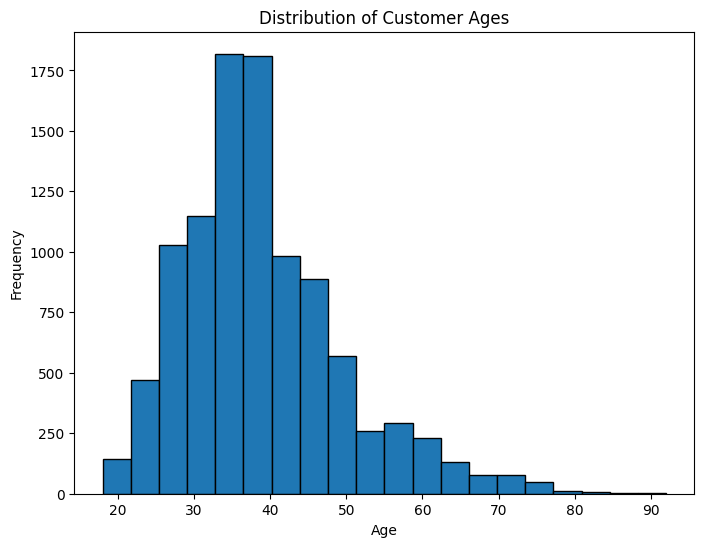

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Customer Ages')

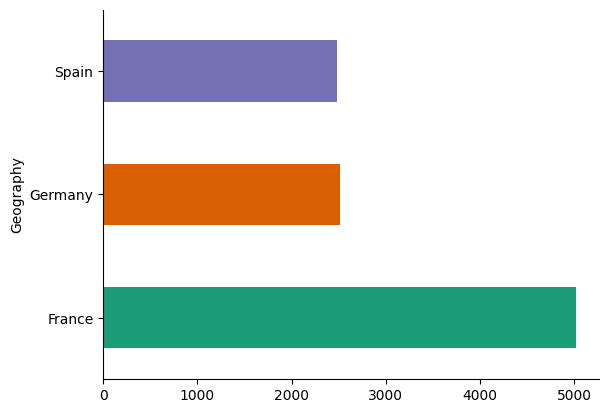

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Geography').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

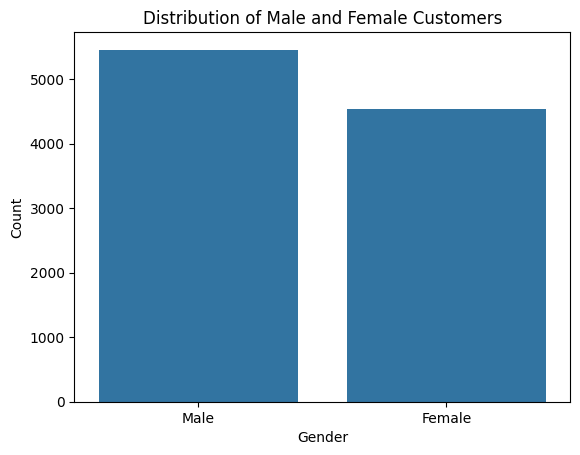

In [ ]:
gender_counts = data['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Distribution of Male and Female Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
data.duplicated().sum()

0

In [ ]:
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})

In [ ]:
new_geo=LabelEncoder()
data["new_geo"]=new_geo.fit_transform(data['Geography'])
data.drop('Geography',axis=1,inplace=True)

In [ ]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_geo
0,619,1,42,2,0.00,1,1,1,101348.88,1,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,2
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,2


In [ ]:
data['Balance_Salary_Ratio'] = data['Balance'] / data['EstimatedSalary']
data.drop(['Balance', 'EstimatedSalary'], axis=1, inplace=True)

In [ ]:
x=data.drop('Exited',axis=1)
y=data['Exited']
x.head()

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,new_geo,Balance_Salary_Ratio
0,619,1,42,2,1,1,1,0,0.000000
1,608,1,41,1,1,0,1,2,0.744677
2,502,1,42,8,3,1,0,0,1.401375
3,699,1,39,1,2,0,0,0,0.000000
4,850,1,43,2,1,1,1,2,1.587055


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
RFC=RandomForestClassifier(random_state=0)
RFC.fit(X_train,y_train)
y_pred1=RFC.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.864
[[1905   86]
 [ 254  255]]


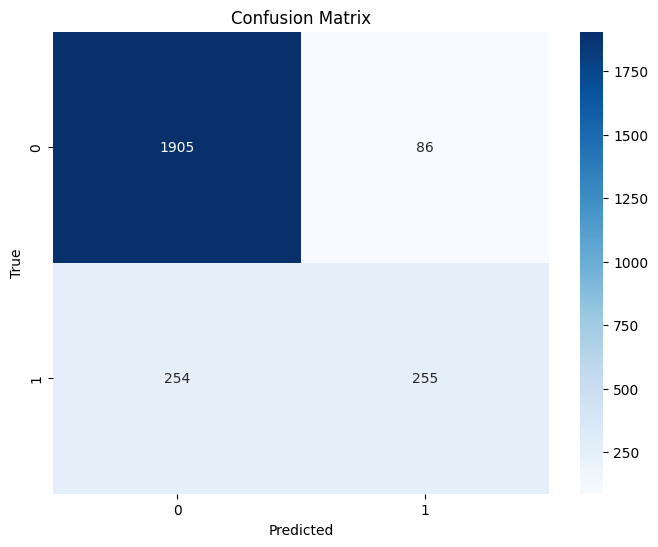

In [ ]:
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()